<a href="https://colab.research.google.com/github/FerSotoApse/computer_vision/blob/main/M03/M3_1-Caracteristicas_Imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Características de Imágenes

En este notebook se usan de forma demostrativa diferentes tipos de procesamiento avanzado de imagen:

- Detección de bordes
- Detección de vértices
- Detección de texturas

In [ ]:
# !pip install opencv-python matplotlib

In [1]:
# librerías para visualización y procesamiento de imágenes
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def abrir_imagen_gris(img_file: str, img_name:str = None) -> np.array:
    """
    Abre una imagen desde fichero o desde url.
    :param file: str con la ruta o url de la imagen
    :param img_name: str con el nombre y extensión para guardar la imagen
    :return: un array con la imagen en escala de grises
    """
    # para detectar origen del archivo
    import re
    # comprueba si es un url revisando si empieza por https
    if bool(re.search("\Ahttps", img_file)) == True:
        import requests
        response = requests.get(img_file)
        if response.status_code == 200:
            # se guarda imagen en array
            img_array = np.frombuffer(response.content, np.uint8)
            img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
            # si se da un nombre (y ruta) en img_name, se guarda la imagen
            if img_name is not None:
                with open(img_name, "wb") as f:
                    f.write(response.content) # se guarda original web
        else:
            img = None
            print(f'Error en url {response.status_code}')
    else:
        try:
            # abre el archivo de imagen directamente desde el path
            img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        except Exception as TypeError:
            print(f"No se pudo cargar la imagen.\n{TypeError}")

    # la imagen entra con escala invertida, esto lo rectifica
#    if img is not None:
#        img = cv2.bitwise_not(img)

    return img

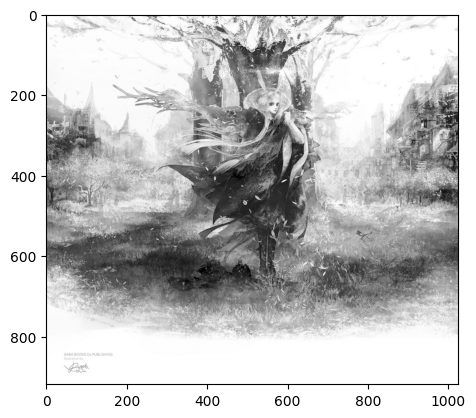

In [3]:
# desde url, sin descargar imagen
img_url: str = 'https://64.media.tumblr.com/tumblr_lm6blyraFW1qkm22do1_1280.jpg'
img = abrir_imagen_gris(img_file = img_url,
                        #img_name = 'sakura_rain.jpg'
                        )
plt.imshow(img, cmap = 'gray')

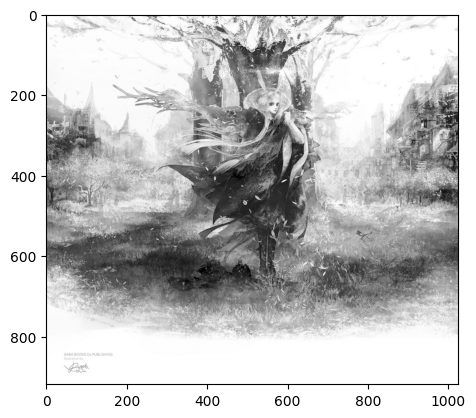

In [ ]:
# desde archivos
img_file = "C:/Users/visionado/Desktop/tumblr_lm6blyraFW1qkm22do1_1280.jpg"
img = abrir_imagen_gris(img_file = img_file)
plt.imshow(img, cmap = 'gray')

## Detectores de Bordes

| Detector | Tipo | Características | Ventajas | Desventajas | Uso Típico |
|----------|------|-----------------|----------|-------------|------------|
| **Canny** | Bordes | - Detección óptima de bordes<br>- Algoritmo de 3 etapas<br>- Supresión de no-máximos<br>- Umbralización por histéresis | - Muy buena precisión<br>- Bordes delgados y continuos<br>- Reduce el ruido | - Más lento computacionalmente<br>- Muchos parámetros para ajustar | Detección precisa de contornos, segmentación de objetos |
| **Sobel** | Bordes | - Operador de convolución 3x3<br>- Calcula gradientes en X e Y<br>- Enfatiza bordes horizontales y verticales | - Rápido y simple<br>- Buena respuesta a bordes fuertes<br>- Menos sensible al ruido que otros | - Bordes más gruesos<br>- Menos preciso en esquinas | Detección rápida de bordes, preprocessing |
| **Scharr** | Bordes | - Mejora del operador Sobel<br>- Kernels optimizados<br>- Mejor respuesta isotrópica | - Mejor precisión que Sobel<br>- Menos artefactos direccionales | - Ligeramente más costoso que Sobel | Detección de bordes con mejor precisión angular |
| **Laplace** | Bordes | - Operador de segunda derivada<br>- Detecta cambios de intensidad<br>- Isotrópico (sin dirección preferida) | - Muy sensible a bordes<br>- Invariante a rotación | - Muy sensible al ruido<br>- Produce bordes dobles | Detección de bordes finos, realce de características |
| **Prewitt** | Bordes | - Similar a Sobel<br>- Kernels 3x3 simples<br>- Enfoque en gradientes | - Muy rápido<br>- Fácil implementación | - Menos preciso que Sobel<br>- Más sensible al ruido | Aplicaciones en tiempo real, detección básica |
| **Roberts** | Bordes | - Kernels 2x2<br>- Operador de gradiente cruzado<br>- Muy simple | - Extremadamente rápido<br>- Mínimo costo computacional | - Muy sensible al ruido<br>- Bordes muy discontinuos | Detección rápida en imágenes simples |

mirar este codigo que muestra la forma precisa de trabajar algunos metodos de deteccion (Sobel, Prewitts, Laplace, Canny):

https://nikatsanka.github.io/comparing-edge-detection-methods.html

sobre forma correcta de deteccion Sobel y Canny con openCV:

https://learnopencv.com/edge-detection-using-opencv/

In [4]:
def prewitt_edge_detection(img: np.array) -> np.array:
    # Prewitt kernels
    prewitt_x = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])

    prewitt_y = np.array([[-1, -1, -1],
                          [ 0,  0,  0],
                          [ 1,  1,  1]])

    # Apply filters
    edges_x = cv2.filter2D(img, -1, prewitt_x)
    edges_y = cv2.filter2D(img, -1, prewitt_y)

    # Combine both directions
    edges = np.sqrt(edges_x**2 + edges_y**2)
    edges = np.uint8(edges)

    return edges

In [5]:
def roberts_edge_detection(img: np.array) -> np.array:
    # Roberts kernels
    roberts_x = np.array([[1, 0],
                          [0, -1]])

    roberts_y = np.array([[0, 1],
                          [-1, 0]])

    # Apply filters
    edges_x = cv2.filter2D(img, -1, roberts_x)
    edges_y = cv2.filter2D(img, -1, roberts_y)

    # Combine both directions
    edges = np.sqrt(edges_x**2 + edges_y**2)
    edges = np.uint8(edges)

    return edges

In [9]:
def deteccion_bordes(image: np.array) -> None:
    """
    Muestra distintos métodos de detección de bordes dentro de una misma imagen
    :param image: array con la imagen en escala de grises
    """
    # detector de bordes Canny
    canny_edges = cv2.Canny(image, 100, 200)  # Los umbrales pueden ajustarse
    # detector de bordes Sobel en X y Y y combinarlos (gradientes horizontal y vertical)
    # funciona mejor con los canales separados (agregar al código)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5) # gradiente horizontal
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5) # gradiene vertical
    sobel_edges = np.sqrt(sobelx ** 2 + sobely ** 2)
    # detector de bordes Scharr en X y Y y combinarlos
    scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    scharr_edges = np.sqrt(scharrx ** 2 + scharry ** 2)
    # detector de bordes Laplace
    laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)
    # detector de bordes Prewitts
    prewitt_edges = prewitt_edge_detection(img = image)
    # detector de bordes Roberts
    roberts_edges = roberts_edge_detection(img = image)

    # plot de detección
    fig, ax = plt.subplots(3, 3, figsize=(12, 8))

    ax[0,0].axis('off'), ax[0,2].axis('off')
    ax[0,1].imshow(image, cmap='gray')
    ax[0,1].set_title('Imagen Original (gris)'), ax[0,1].axis('off')

    ax[1,0].imshow(canny_edges, cmap='gray')
    ax[1,0].set_title('Detector Canny'), ax[1,0].axis('off')

    ax[1,1].imshow(sobel_edges, cmap='gray')
    ax[1,1].set_title('Detector Sobel'), ax[1,1].axis('off')

    ax[1,2].imshow(scharr_edges, cmap='gray')
    ax[1,2].set_title('Detector Scharr'), ax[1,2].axis('off')

    ax[2,0].imshow(laplacian_edges, cmap='gray')
    ax[2,0].set_title('Detector Laplace'), ax[2,0].axis('off')

    ax[2,1].imshow(prewitt_edges, cmap='gray')
    ax[2,1].set_title('Detector Prewitts'), ax[2,1].axis('off')

    ax[2,2].imshow(roberts_edges, cmap='gray')
    ax[2,2].set_title('Detector Roberts'), ax[2,2].axis('off')

    plt.tight_layout()
    plt.show()

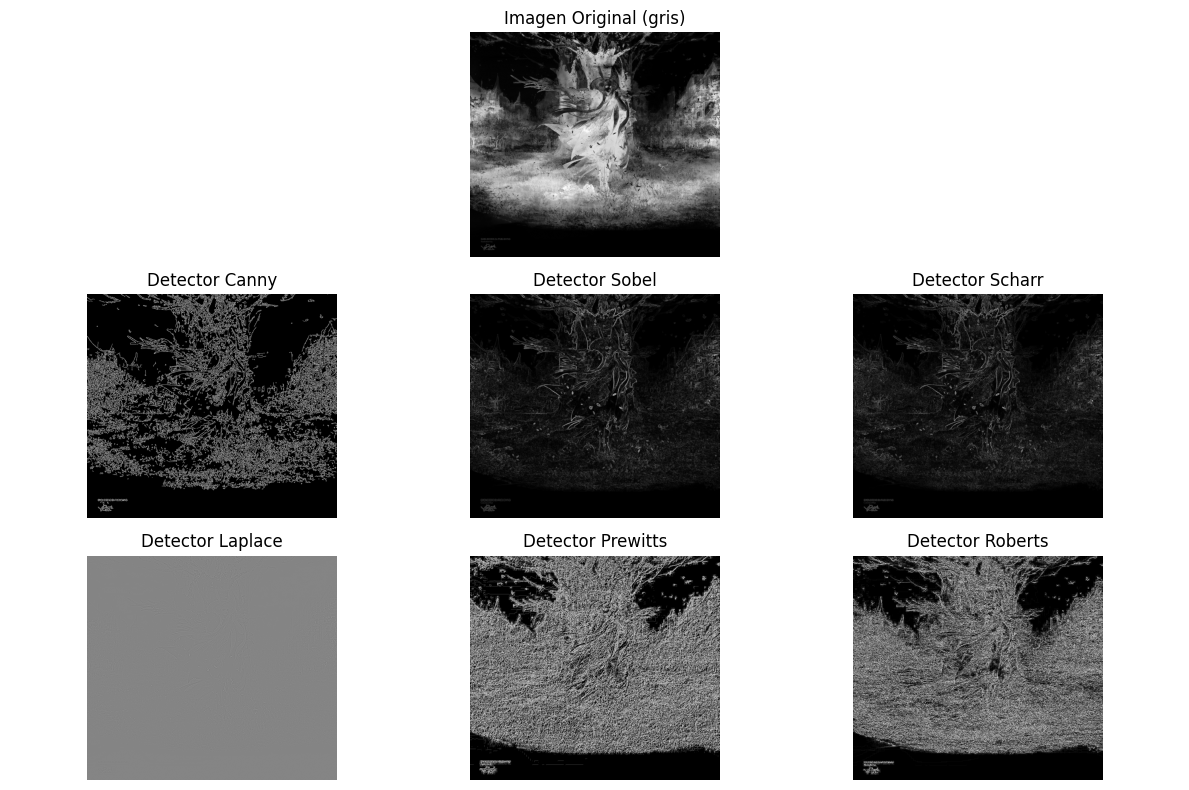

In [11]:
deteccion_bordes(image = img)

## Detección de Esquinas

Los detectores de esquinas buscan identificar puntos en una imagen donde los cambios de intensidad ocurren en múltiples direcciones. Es decir, esquinas o intersecciones de bordes. Estos puntos suelen ser buenos para rastrear o comparar entre imágenes debido a su estabilidad.

¿Por qué son útiles?
Son ideales para seguimiento de movimiento, reconocimiento de objetos, y SLAM (localización y mapeo simultáneo).

Sirven como puntos clave para descriptores (como ORB, SIFT, SURF).

Tipos principales:
Solo esquinas: Harris, Shi-Tomasi, FAST → Más rápidos, usados para detección pura.

Esquinas + descriptores: ORB, SIFT, SURF → Incluyen información adicional para "describir" la región, útil en matching entre imágenes.


| Detector                  | Tipo                    | Características                                             | Ventajas                                                   | Desventajas                                               | Uso Típico                                     |
|--------------------------|-------------------------|-------------------------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------|
| Harris                   | Esquinas                | Basado en autovalores de la matriz de covarianza            | Preciso, resistente al ruido moderado                      | No invariante a escala                                     | Seguimiento de puntos clave, visión 3D        |
| Shi-Tomasi (Good Features to Track) | Esquinas      | Mejora de Harris, selecciona esquinas más "fuertes"         | Mejora la calidad de esquinas detectadas                   | No apto para grandes cambios de escala                     | Seguimiento de objetos en video               |
| FAST                     | Esquinas                | Análisis de vecindad circular de píxeles                    | Muy rápido, apto para tiempo real                          | No robusto frente a ruido o rotación                       | SLAM, robótica móvil                          |
| ORB                      | Esquinas + Descriptores | Combina FAST y BRIEF, eficiente y rotación invariante       | Rápido, eficiente, libre de patentes                       | Menos preciso que SIFT o SURF                              | Matching en tiempo real, aplicaciones móviles |
| SIFT                     | Esquinas + Descriptores | Escala invariante, detección multiescala                    | Muy robusto, invariante a escala, rotación, iluminación    | Patente (hasta 2020), computacionalmente costoso           | Matching robusto, reconocimiento de objetos    |
| SURF                     | Esquinas + Descriptores | Más rápido que SIFT, basado en Haar wavelets                | Rápido, preciso                                            | Aún patentado, menos robusto que SIFT en algunas condiciones | Reconocimiento, matching rápido               |


In [12]:
# para la detección de esquinas, la imagen debe estar en escala de grises
# los keypoints siguen una estructura de coordenadas (x, y)
# dependiendo del algoritmo de detección habrán otras carcterísicas (radio, figuras...)

def show_keypoints(image, keypoints, title: str = None):
    """
    Muestra los puntos detectados según el algoritmo de detección dado

    :params image: imagen en numpy array
    :params keypoints: algoritmo de detección basado en OpenCV
    :params title: titulo del gráfico
    """
    img_kp = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

show_keypoints(image = img, keypoints = ..., title = 'Prueba')

In [ ]:
# Scale-Variant Feature Transform
def sift_detector(image: np.array):
    """Detector Scale-Variant Feature Transform"""
    sift = cv2.SIFT_create()
    kp_sift = sift.detect(image, None) # funcón de detección
    return kp_sift

In [ ]:
# Harris Corner Detector (algoritmo de detección 1)
def harris_detector(image: np.array):
    # copia la imagen de entrada, asegura que este en grises
    img_copy = image.copy()
    img_copy = np.float32(img_copy)
    # algoritmo Harris
    harris = cv2.cornerHarris(img_copy, blockSize=2, ksize=3, k=0.04)
    harris = cv2.dilate(harris, None)
    # aplica los resultados de detección a la imagen de entrada
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    result[harris > 0.01 * harris.max()] = [0, 0, 255]
    return result

In [ ]:
# Harris Corner Detector (algoritmo de detección 1)
def harris_detector(img_gray):
    img_copy = img_gray.copy()
    img_copy = np.float32(img_copy)
    harris = cv2.cornerHarris(img_copy, blockSize=2, ksize=3, k=0.04)
    harris = cv2.dilate(harris, None)
    result = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
    result[harris > 0.01 * harris.max()] = [0, 0, 255]
    plt.imshow(result)
    plt.title('Harris Corner Detection')
    plt.axis('off')
    plt.show()

In [ ]:




# Shi-Tomasi (Good Features to Track)
def shi_tomasi_detector(img_gray):
    corners = cv2.goodFeaturesToTrack(img_gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
    corners = np.intp(corners)
    result = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
    for i in corners:
        # ravel se puede usar en un array i, descompone el resulado en más de una variable
        # retorna un vector con n valores
        x, y = i.ravel()
        cv2.circle(result, (x, y), 4, (0, 255, 0), -1)
    plt.imshow(result)
    plt.title('Shi-Tomasi Detector')
    plt.axis('off')
    plt.show()

# FAST
fast = cv2.FastFeatureDetector_create()
kp_fast = fast.detect(img_gray, None)
show_keypoints(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR), kp_fast, 'FAST Detector')

# ORB
orb = cv2.ORB_create()
kp_orb = orb.detect(img_gray, None)
show_keypoints(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR), kp_orb, 'ORB Detector')

# SIFT (requiere opencv-contrib)
try:
    sift = cv2.SIFT_create()
    kp_sift = sift.detect(img_gray, None)
    show_keypoints(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR), kp_sift, 'SIFT Detector')
except:
    print("SIFT no está disponible. Asegúrate de tener instalado OpenCV con contrib.")

# SURF (requiere opencv-contrib y puede estar restringido por licencia)
try:
    surf = cv2.xfeatures2d.SURF_create()
    kp_surf = surf.detect(img_gray, None)
    show_keypoints(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR), kp_surf, 'SURF Detector')
except:
    print("SURF no está disponible. Verifica instalación y licencias.")

# Harris y Shi-Tomasi por separado
harris_detector(img_gray)
shi_tomasi_detector(img_gray)

## Detección de Texturas

La textura se refiere a los patrones repetitivos o estructuras locales en una imagen que ayudan a describir la apariencia de una superficie (por ejemplo: rugosa, lisa, granulada, etc.). A diferencia de los bordes o esquinas, la textura analiza cómo cambian los valores de los píxeles en una región, no solo en un punto

| Detector        | Tipo    | Características                                    | Ventajas                                             | Desventajas                                           | Uso Típico                                 |
|-----------------|---------|----------------------------------------------------|-------------------------------------------------------|--------------------------------------------------------|---------------------------------------------|
| LBP             | Textura | Codifica vecindad local como patrón binario        | Muy rápido, simple, invariante a iluminación         | No maneja bien ruido o variaciones de escala          | Clasificación de texturas, reconocimiento facial |
| Gabor Filters   | Textura | Conjuntos de filtros orientados y a distintas frecuencias | Buena extracción de textura y orientación            | Alto coste computacional                              | Análisis de texturas, biometría             |
| Haralick        | Textura | Usa matrices de co-ocurrencia (GLCM)               | Extrae múltiples características estadísticas        | Depende del tamaño y orientación de la ventana        | Clasificación de patrones y análisis de texturas |

In [ ]:
from skimage.feature import local_binary_pattern
from skimage.feature.texture import graycomatrix, graycoprops # Corrected import
from skimage import img_as_ubyte
import scipy.ndimage as nd

# Asegúrate de que img_gray está definida (escala de grises)

### 1. Local Binary Patterns (LBP)
def lbp_texture(img_gray, radius=1, n_points=8):
    lbp = local_binary_pattern(img_gray, n_points, radius, method='uniform')
    plt.figure(figsize=(6, 6))
    plt.imshow(lbp, cmap='gray')
    plt.title('Local Binary Patterns (LBP)')
    plt.axis('off')
    plt.show()

### 2. Filtros de Gabor
def gabor_filter_bank(img_gray):
    def apply_gabor(theta, frequency):
        kernel = cv2.getGaborKernel((21, 21), 5.0, theta, frequency, 0.5, 0, ktype=cv2.CV_32F)
        filtered = cv2.filter2D(img_gray, cv2.CV_8UC3, kernel)
        return filtered

    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    frequencies = [0.1, 0.2]

    fig, axs = plt.subplots(len(angles), len(frequencies), figsize=(10, 10))
    for i, theta in enumerate(angles):
        for j, freq in enumerate(frequencies):
            result = apply_gabor(theta, freq)
            axs[i, j].imshow(result, cmap='gray')
            axs[i, j].set_title(f'Theta={np.round(theta,2)}, Freq={freq}')
            axs[i, j].axis('off')
    plt.suptitle('Gabor Filters')
    plt.tight_layout()
    plt.show()

### 3. Haralick (GLCM)
def haralick_features(img_gray):
    # Convert to 8-bit
    img_ubyte = img_as_ubyte(img_gray)
    glcm = graycomatrix(img_ubyte, distances=[1], angles=[0], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    print("Haralick Features (GLCM):")
    print(f" - Contrast: {contrast:.4f}")
    print(f" - Homogeneity: {homogeneity:.4f}")
    print(f" - Energy: {energy:.4f}")
    print(f" - Correlation: {correlation:.4f}")

# Ejecutar todos
lbp_texture(img_gray)
gabor_filter_bank(img_gray)
haralick_features(img_gray)